In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [7]:
df=pd.DataFrame({ 'x1':[12,20,28,18,29,33,24,45,43,51,52,55,53,54,61,64,69,52,6,62,45,60,59,8], 
                 'x2':[39,36,30,52,54,46,55,59,63,70,66,63,58,14,8,19,7,24,77,65,80,4,72,45]
                 })

In [8]:
x = df
x.head()

,x1,x2
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54


In [9]:
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
model.cluster_centers_

array([[51.66666667, 66.22222222],
       [60.        , 12.66666667],
       [19.77777778, 48.22222222]])

In [25]:
model.labels_


array([2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       0, 2], dtype=int32)

In [26]:
df['predict'] = model.labels_

In [27]:
df.head()

,x1,x2,predict
0,12,39,2
1,20,36,2
2,28,30,2
3,18,52,2
4,29,54,2


In [28]:
df['predict'].value_counts()

2    9
0    9
1    6
Name: predict, dtype: int64

In [31]:
labels = model.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1,
       0, 2], dtype=int32)

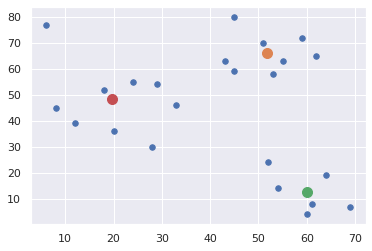

In [35]:
plt.scatter(df['x1'],df['x2'],30)
for i in model.cluster_centers_:
  plt.scatter(i[0],i[1],100)
plt.show()

**Elbow Method**

In [39]:
wcss = []
for i in range(1,10):
  km = KMeans(n_clusters=i,random_state=2)
  km.fit(x)
  inertia = km.inertia_
  wcss.append(inertia)
wcss

[21093.791666666668,
 9508.055555555557,
 3456.0,
 2310.763888888889,
 1742.6388888888887,
 1474.5833333333335,
 1167.25,
 886.0833333333333,
 773.8333333333333]

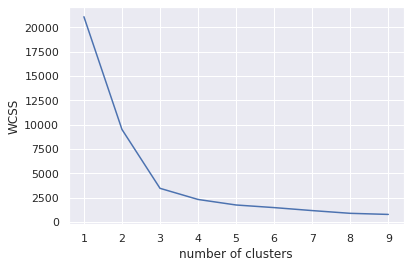

In [40]:
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.plot(range(1,10),wcss)
plt.show()